In [25]:
from __future__ import absolute_import
from __future__ import print_function
# For manipulating data
import pandas as pd
import numpy as np
from keras.utils import np_utils # For y values
# For plotting
%matplotlib inline
import seaborn as sns
# For Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

In [26]:
# Set data
data = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 1],
    [7, 7, 1],
    [8, 8, 1],
    [9, 9, 1],
])
data = np.vstack((data, data, data, data)) # Just for sufficient input
data = pd.DataFrame(data, columns=['x', 'y', 'class'])

In [27]:
# Split X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [28]:
# Get dimensions of input and output
dimof_input = X.shape[1]
dimof_output = len(set(y.flat))
print('dimof_input: ', dimof_input)
print('dimof_output: ', dimof_output)

dimof_input:  2
dimof_output:  2


In [29]:
# Set y categorical
y = np_utils.to_categorical(y, dimof_output)

In [30]:
# Set constants
batch_size = 128
dimof_middle = 100
dropout = 0.2
countof_epoch = 100
verbose = 0
print('batch_size: ', batch_size)
print('dimof_middle: ', dimof_middle)
print('dropout: ', dropout)
print('countof_epoch: ', countof_epoch)
print('verbose: ', verbose)
print()

batch_size:  128
dimof_middle:  100
dropout:  0.2
countof_epoch:  100
verbose:  0



In [39]:
# Set model
model = Sequential()
model.add(Dense(dimof_middle, input_dim=dimof_input, init='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dimof_middle, input_dim=dimof_middle, init='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dimof_output, input_dim=dimof_middle, init='uniform', activation='softmax'))
model.compile(loss='mse', optimizer='sgd')

In [40]:
# Train
model.fit(
    X, y,
    show_accuracy=True, validation_split=0.2,
    batch_size=batch_size, nb_epoch=countof_epoch, verbose=verbose)

In [41]:
# Evaluate
loss, accuracy = model.evaluate(X, y, show_accuracy=True, verbose=verbose)
print('loss: ', loss)
print('accuracy: ', accuracy)
print()

loss:  0.23058898747
accuracy:  0.7



In [42]:
# Predict
# model.predict_classes(X, verbose=verbose)
print('prediction of [1, 1]: ', model.predict_classes(np.array([[1, 1]]), verbose=verbose))
print('prediction of [8, 8]: ', model.predict_classes(np.array([[8, 8]]), verbose=verbose))

prediction of [1, 1]:  [0]
prediction of [8, 8]:  [1]


/home/hpc_allikivi/virtualenv-1.11.6/myVE/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


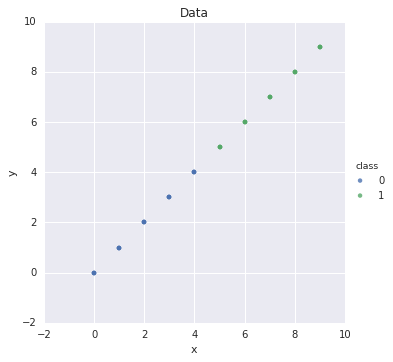

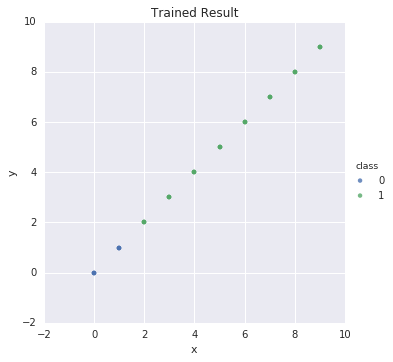

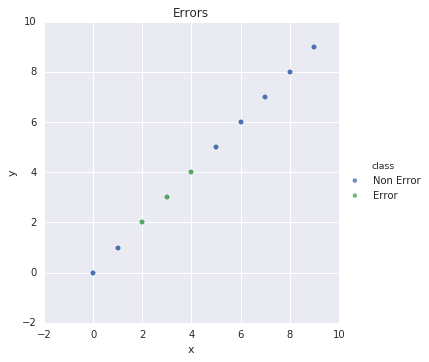

In [43]:
# Plot
sns.lmplot('x', 'y', data, 'class', fit_reg=False).set(title='Data')
data_ = data.copy()
data_['class'] = model.predict_classes(X, verbose=0)
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Trained Result')
data_['class'] = [ 'Error' if is_error else 'Non Error' for is_error in data['class'] != data_['class']]
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Errors')